## Task 2
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df=pd.read_csv('titanic_train.csv')

In [110]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Basic Checks

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
df.shape

(891, 12)

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [116]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [117]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Finding and handling Missing or duplicated values

In [118]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
len(df[df.duplicated()])

0

In [120]:
column_to_fill = 'Age'
df[column_to_fill] = df[column_to_fill].fillna(df[column_to_fill].mean())

In [121]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna('Unknown')

In [122]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Looking for outliers and handling them

U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\

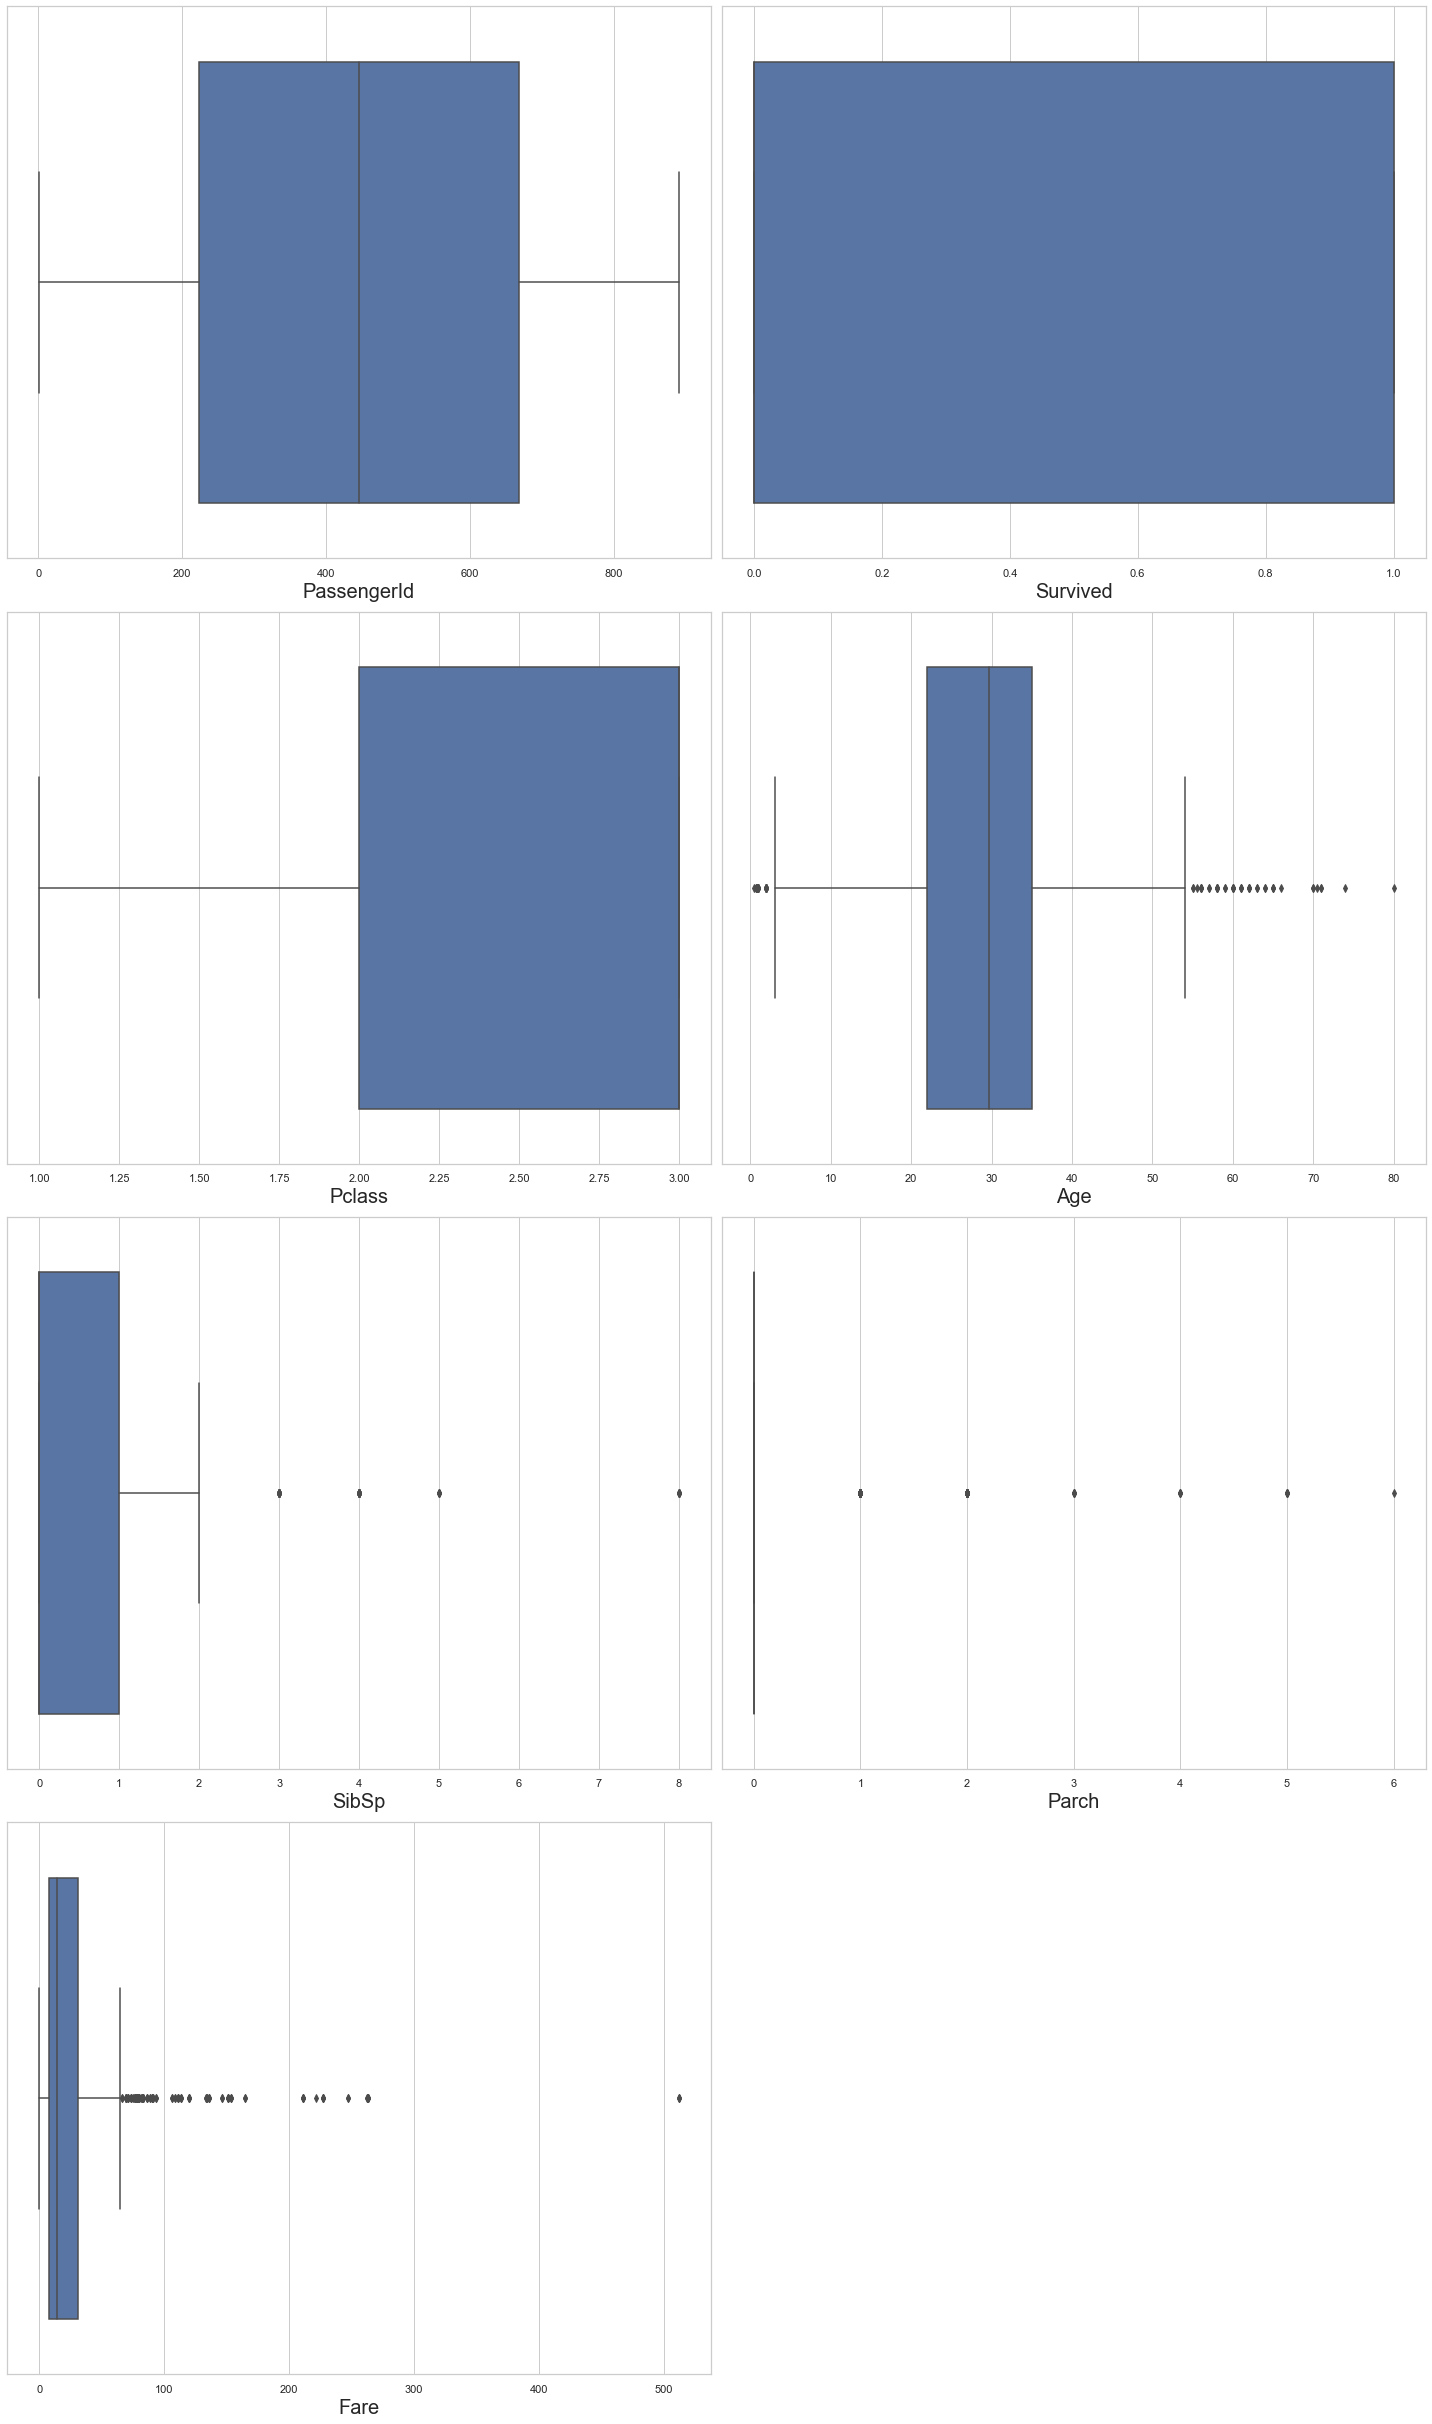

In [123]:
cols=df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

plt.figure(figsize=(20,50))
plotno = 1

for column in cols:
    if plotno<=14:   
        plt.subplot(6,2,plotno) 
        sns.boxplot(cols[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1 
plt.tight_layout()
plt.show() 

In [124]:
from scipy import stats

In [125]:
iqr = stats.iqr(df['Age'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 13.0
Minimum limit: 2.5
Maximum Limit: 54.5


C:\Users\asifa\AppData\Local\Temp\ipykernel_6716\2715064007.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  iqr = stats.iqr(df['Age'],interpolation='midpoint')


In [126]:
df.loc[df['Age'] > max_limit,'Age']=df['Age'].median()

In [127]:
df.loc[df['Age'] > max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [128]:
iqr = stats.iqr(df['Fare'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 23.0896
Minimum limit: -26.724
Maximum Limit: 65.6344


C:\Users\asifa\AppData\Local\Temp\ipykernel_6716\2873659972.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  iqr = stats.iqr(df['Fare'],interpolation='midpoint')


In [129]:
df.loc[df['Fare'] > max_limit,'Fare']=df['Fare'].median()

In [130]:
df.loc[df['Fare'] > max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [131]:
iqr = stats.iqr(df['SibSp'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: -1.5
Maximum Limit: 2.5


C:\Users\asifa\AppData\Local\Temp\ipykernel_6716\2698587683.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  iqr = stats.iqr(df['SibSp'],interpolation='midpoint')


In [132]:
df.loc[df['SibSp'] > max_limit,'SibSp']=df['SibSp'].median()

In [133]:
df.loc[df['SibSp'] > max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [134]:
iqr = stats.iqr(df['Parch'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 0.0
Minimum limit: 0.0
Maximum Limit: 0.0


C:\Users\asifa\AppData\Local\Temp\ipykernel_6716\1609313131.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  iqr = stats.iqr(df['Parch'],interpolation='midpoint')


In [135]:
df.loc[df['Parch'] > max_limit,'Parch']=df['Parch'].median()

In [136]:
df.loc[df['Parch'] > max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\

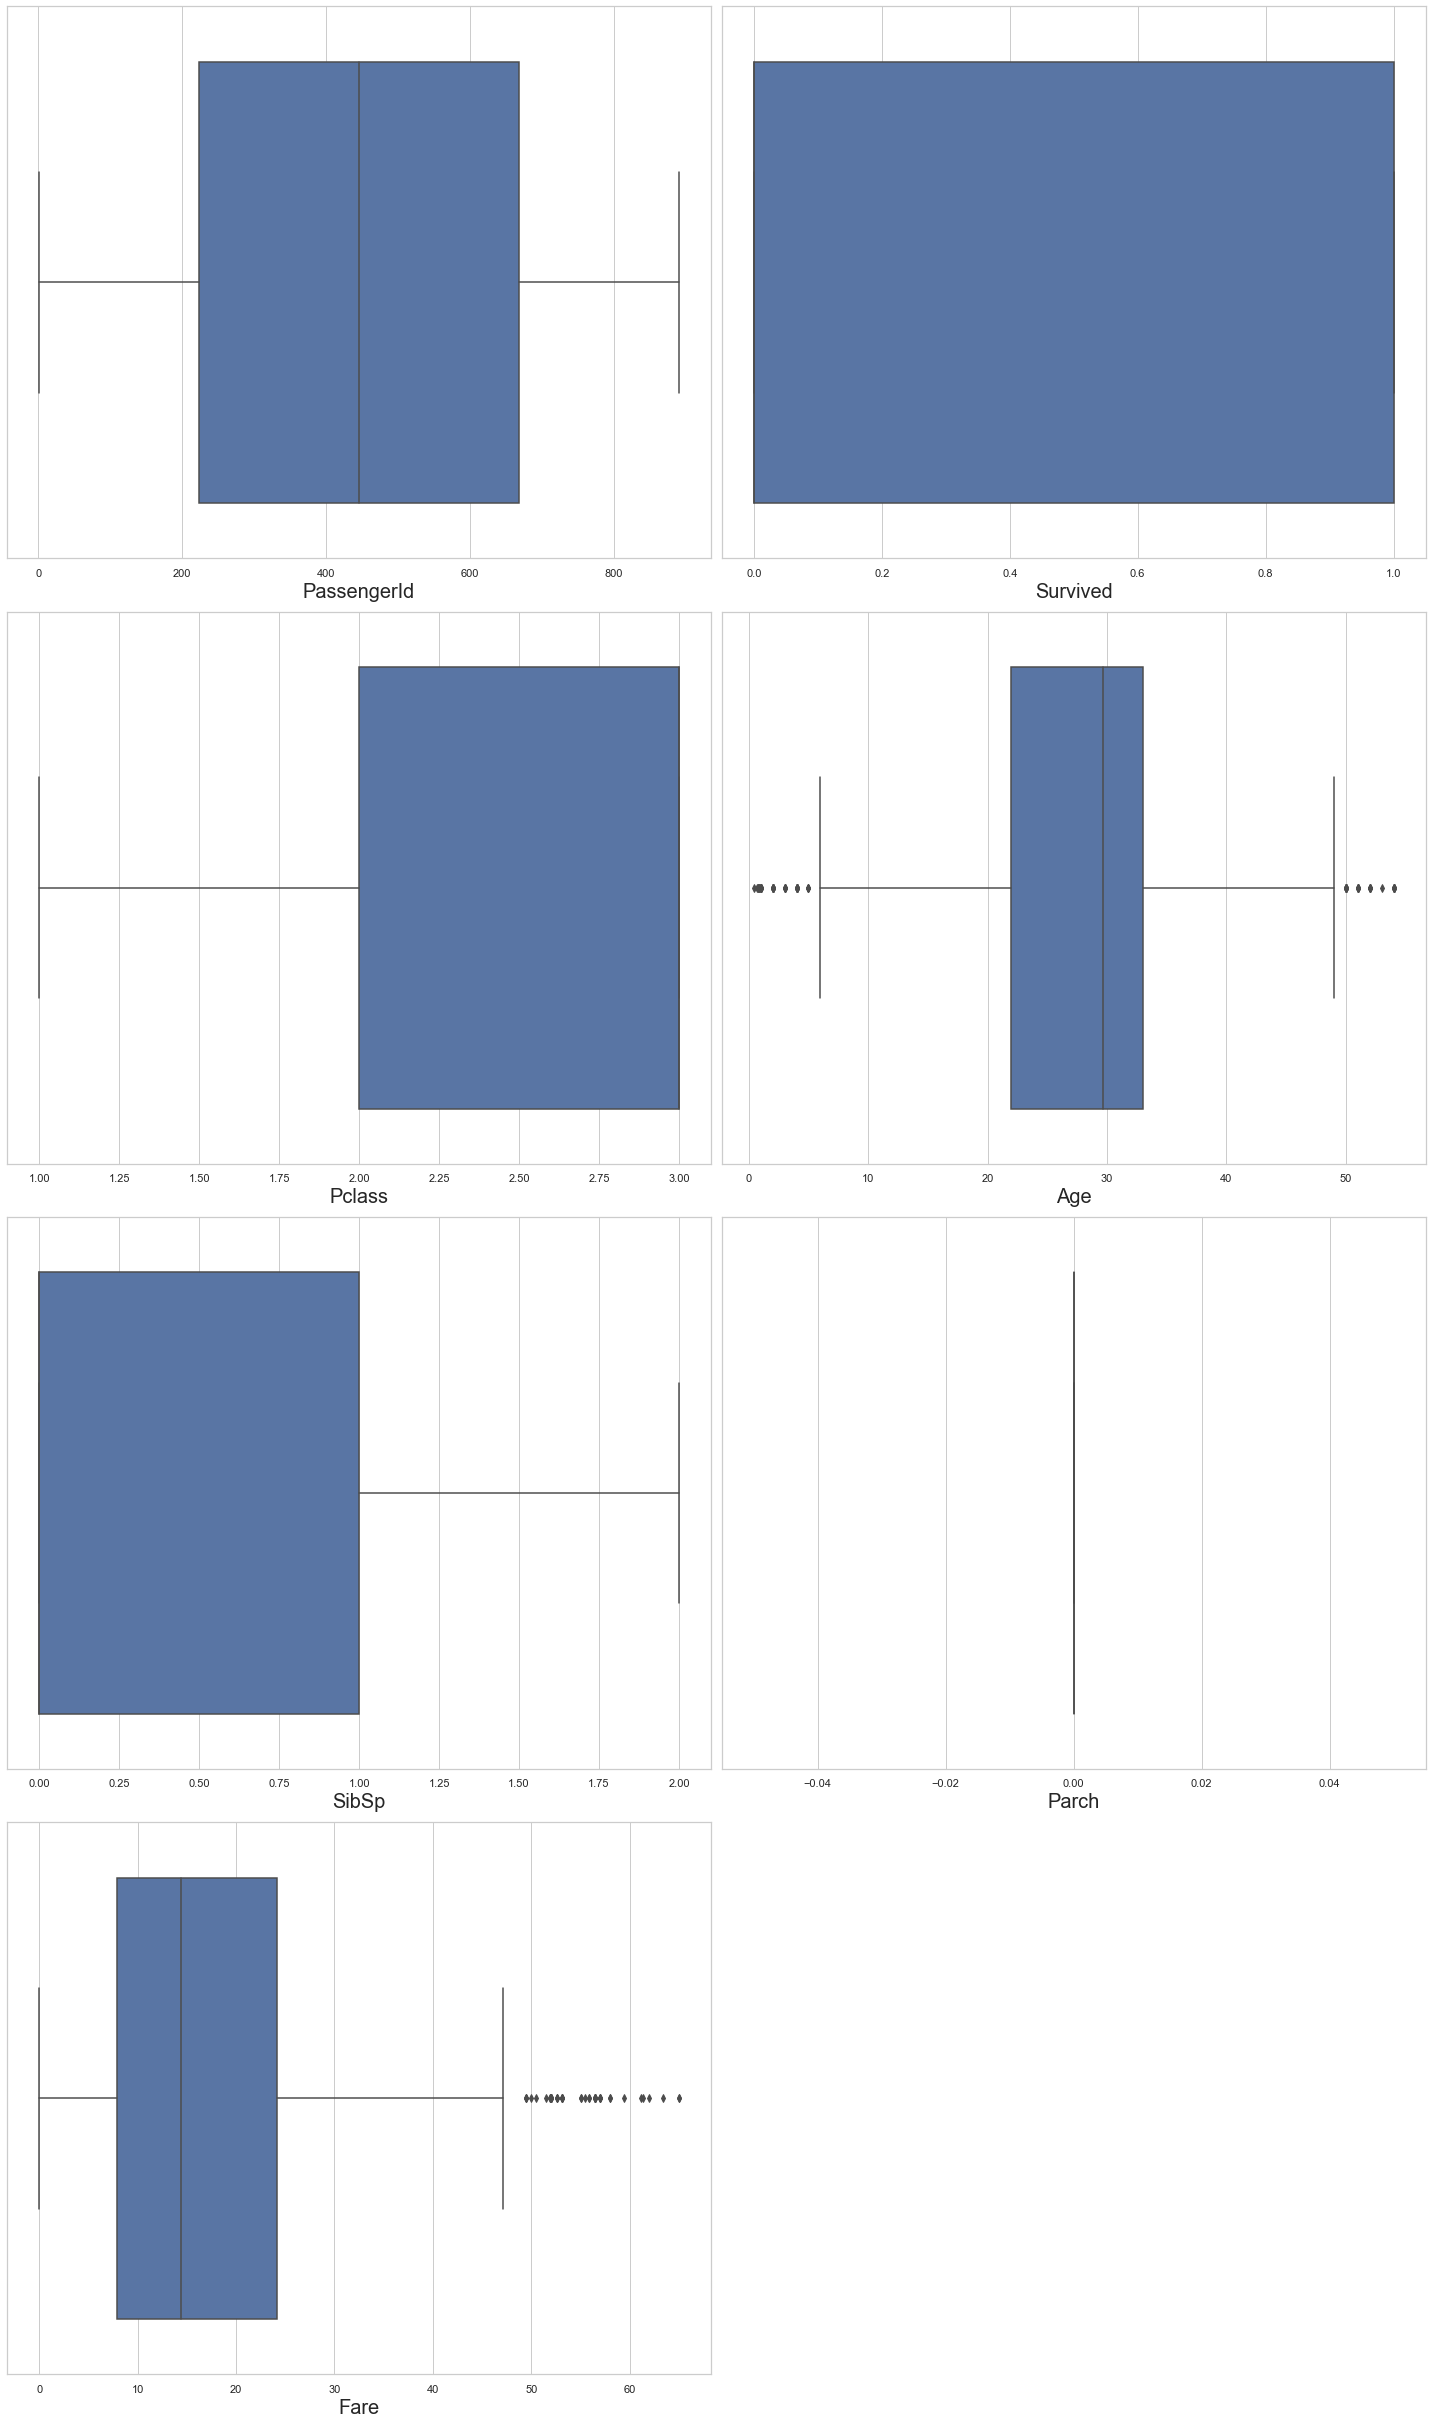

In [137]:
cols=df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

plt.figure(figsize=(20,50))
plotno = 1

for column in cols:
    if plotno<=14:   
        plt.subplot(6,2,plotno) 
        sns.boxplot(cols[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1 
plt.tight_layout()
plt.show() 

### Visualizations

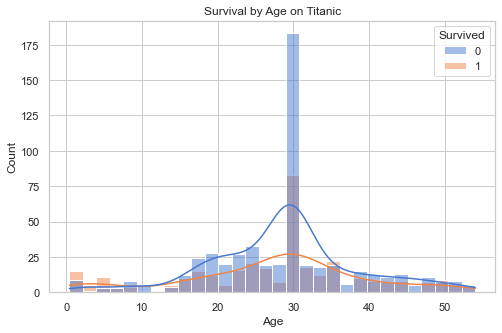

In [138]:
plt.figure(figsize=(8, 5))
sns.histplot(x='Age', hue='Survived', data=df, kde=True, palette='muted', bins=30)
plt.title('Survival by Age on Titanic')
plt.xlabel('Age')
plt.show()

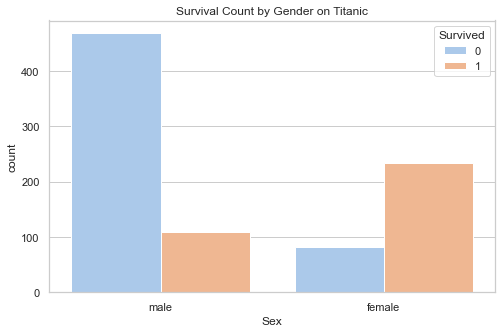

In [139]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Survival Count by Gender on Titanic')
plt.show()

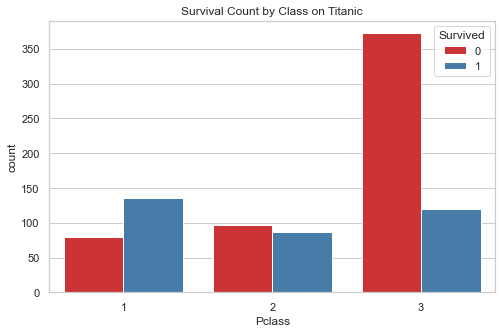

In [151]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by Class on Titanic')
plt.show()

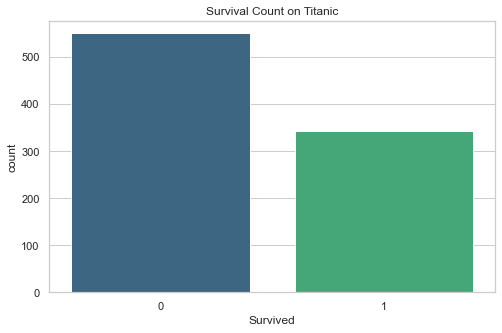

In [152]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count on Titanic')
plt.show()

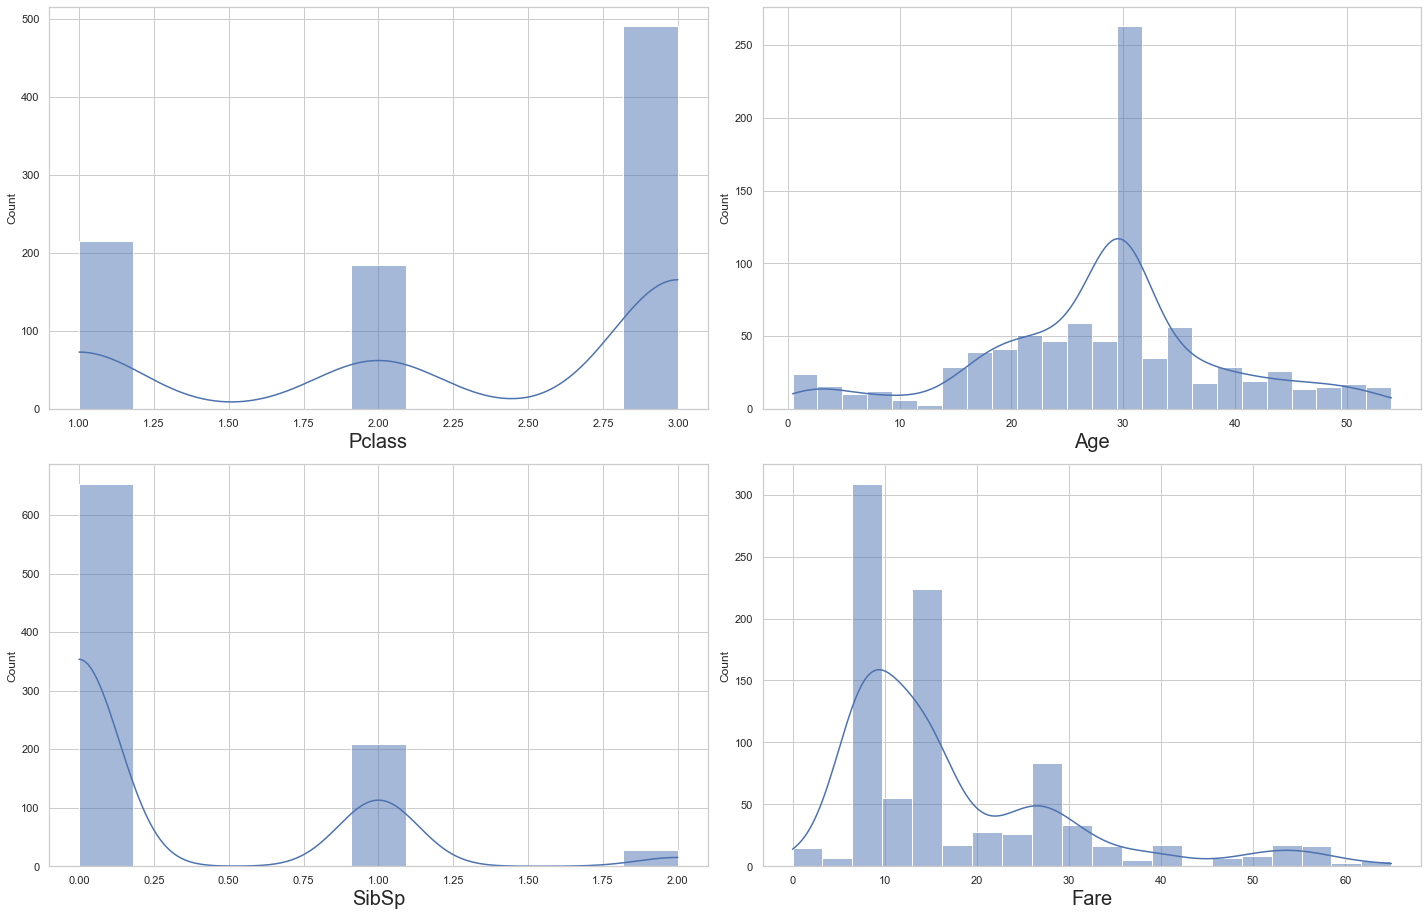

In [142]:
cols=df[['Pclass', 'Age', 'SibSp', 'Fare']]

plotno=1
plt.figure(figsize=(20,25))

for column in cols:
    if plotno<=8:   
        plt.subplot(4,2,plotno)
        sns.histplot(x=cols[column],kde=True) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1
plt.tight_layout()
plt.show()

In [143]:
corr_matrix = df[[ 'Survived', 'Pclass','Age', 'SibSp','Fare']].corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.059444,0.160608,0.190926
Pclass,-0.338481,1.000000,-0.269391,-0.128272,-0.433904
Age,-0.059444,-0.269391,1.000000,-0.015557,0.033719
SibSp,0.160608,-0.128272,-0.015557,1.000000,0.241798
Fare,0.190926,-0.433904,0.033719,0.241798,1.000000


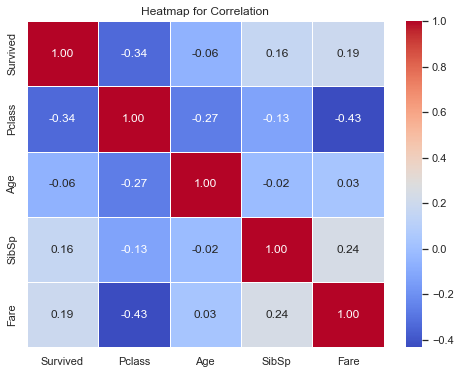

In [144]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap for Correlation')
plt.show()

### Checking the skewness and kurtosis

In [145]:
print('1.Age:',df['Age'].skew())
print('2.Survived:',df['Survived'].skew())
print('3.SibSps:',df['SibSp'].skew())
print('4.Pclass:',df['Pclass'].skew())
print('5.Fare:',df['Fare'].skew())

1.Age: -0.20762640048862288
2.Survived: 0.4785234382949897
3.SibSps: 1.5348392728746048
4.Pclass: -0.6305479068752845
5.Fare: 1.6166694717995465


In [146]:
print('1.Age:',df['Age'].kurtosis())
print('2.Survived:',df['Survived'].kurtosis())
print('3.SibSps:',df['SibSp'].kurtosis())
print('4.Pclass:',df['Pclass'].kurtosis())
print('5.Fare:',df['Fare'].kurtosis())

1.Age: 0.5460450824781407
2.Survived: -1.775004671066304
3.SibSps: 1.440317759636644
4.Pclass: -1.2800149715782825
5.Fare: 2.2769148609634464


### Dropping the unwanted columns

In [147]:
columns_to_drop = ['PassengerId', 'Name','Sex','Ticket','Cabin','Embarked']

In [148]:
df=df.drop(columns=columns_to_drop,axis=1)

In [149]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,14.4542
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,0,23.4500
889,1,1,26.000000,0,0,30.0000
